# Introduction to Regression with Neural Networks in TensorFlow

**Recommended Book:** Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, 2nd Edition

Definition of regression: predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit

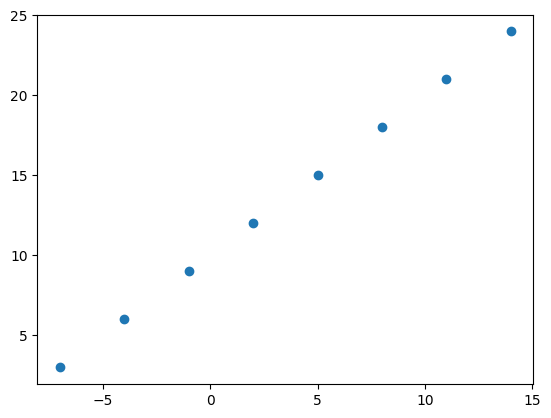

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

## Input and output shapes

In [3]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
# Turn array X,y to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers.
2. **Compiling a model** -  define the loss function (which can tell our model how wrong it is), and evaluation metrics (what we can use to interpret the performance of the model).
3. **Fitting a model** - find the patterns between X and y (features and lables).

Hyperparameters:
* Loss - how wrong your model's predictions are compared to true lables.
* Optimizer - how your model should update its internal patterns
* Metrics - human interpretable values for model performance.
* Epochs -  how many times the model will go through all of the training examples.
* Learning rate - smaller indicate take smaller steps in optimization process.

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [6]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using teh Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # take input one number and predict one number
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # optimizer="sgd"
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 9.3832 - mae: 9.3832
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 9.2507 - mae: 9.2507
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 9.1182 - mae: 9.1182
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 8.9857 - mae: 8.9857
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 8.8532 - mae: 8.8532


In [7]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
# Try and make a prediction with our model
model.predict([17.0, 10.0])

1/1 [==============================] - 1s 618ms/step


array([[23.020681],
       [13.562165]], dtype=float32)

## Improving our model

We can improve by altering the steps we took to create a model

1. add more layers, increase the number of hidden units (neurons), within each of the hidden layers, change the activation function of each layer.
2. changeb the optimization function or perhaps the **learning rate**.
3. fit a model for more **epochs** (traning longer) or on more data (more examples to learn from).

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* change the activation
* change the optimization
* change the learning rate
* Fitting on more data
* Fitting for longer

In [9]:
# larger model
# 1. create a model using teh Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # take input one number and predict one number
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # optimizer="sgd"
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.5149 - mae: 14.5149
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 14.3824 - mae: 14.3824
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 14.2499 - mae: 14.2499
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 14.1174 - mae: 14.1174
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 13.9849 - mae: 13.9849
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 13.8524 - mae: 13.8524
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 13.7199 - mae: 13.7199
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 13.5874 - mae: 13.5874
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 13.4549 - mae: 13.4549
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 13.3224 - mae: 13.3224
Epoch 11/100
1/1 [==============================] -

In [10]:
# Let's see if prediction has improved...
predict1 = model.predict([17.0])

1/1 [==============================] - 0s 337ms/step


In [11]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Improve: add one more layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    # optimizer= tf.keras.optimizers.SGD(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.3387 - mae: 12.3387
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 11.6936 - mae: 11.6936
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 11.0448 - mae: 11.0448
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 10.3900 - mae: 10.3900
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 9.7264 - mae: 9.7264
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 9.0511 - mae: 9.0511
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 8.3604 - mae: 8.3604
Epoch 8/100
1/1 [==============================] - 0s 35ms/step - loss: 7.6502 - mae: 7.6502
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 6.9160 - mae: 6.9160
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 6.8466 - mae: 6.8466
Epoch 11/100
1/1 [==============================] - 0s 22ms/ste

In [13]:
model.predict([17.0]) # the model may be overated

1/1 [==============================] - 0s 122ms/step


array([[27.72761]], dtype=float32)

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 68ms/step


array([[27.72761]], dtype=float32)

In [15]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
# Create a larger data set
larger_X = tf.constant([-7., -4., -1.,  2.,  5.,  8., 11., 14.,16.0, 19.0, 20.0, 24.0, 26.0, 28.0, 30.0, 35.0, 36.0, 40.0, 42.0])
larger_y = tf.constant([3.,  6.,  9., 12., 15., 18., 21., 24., 26.0, 29.0, 30.0, 34.0, 36.0, 38.0, 40.0, 45.0, 46.0, 50.0, 52.0])
larger_X, larger_y

(<tf.Tensor: shape=(19,), dtype=float32, numpy=
 array([-7., -4., -1.,  2.,  5.,  8., 11., 14., 16., 19., 20., 24., 26.,
        28., 30., 35., 36., 40., 42.], dtype=float32)>,
 <tf.Tensor: shape=(19,), dtype=float32, numpy=
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 26., 29., 30., 34., 36.,
        38., 40., 45., 46., 50., 52.], dtype=float32)>)

In [17]:
model.fit(tf.expand_dims(larger_X, axis=-1), larger_y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 824ms/step - loss: 0.8384 - mae: 0.8384
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.4298 - mae: 0.4298
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.4219 - mae: 0.4219
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.5925 - mae: 0.5925
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.1826 - mae: 0.1826
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6394 - mae: 0.6394
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1232 - mae: 0.1232
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5619 - mae: 0.5619
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1851 - mae: 0.1851
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.4555 - mae: 0.4555
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - l

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 211ms/step


array([[27.121803]], dtype=float32)

## Evaluating a value

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ->...
```

When it comes to evaluation, remember 3 words:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what are we working with
* the model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of model line up against the original labels?

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make lables for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

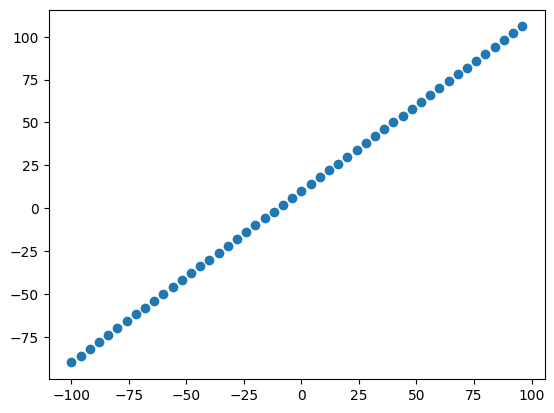

In [21]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets

* Training set
* Validation set
* Test set

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

In [22]:
len(X)

50

In [23]:
from os import X_OK
# Split the data into train and test data
X_train = X[:40] # training samples (80%)
y_train = y[:40]

X_test = X[40:] # test samples (20%)
y_test = y[40:]

### Visalizing the data
We've got training and testing data.

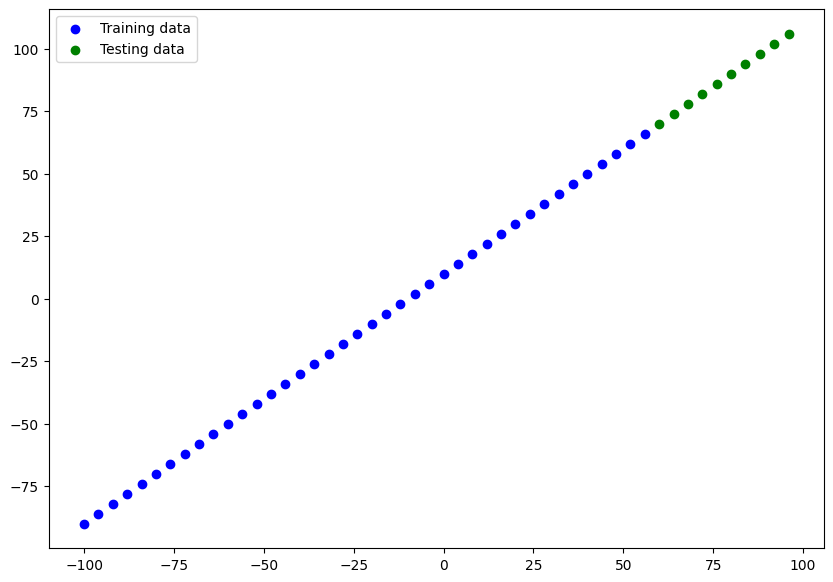

In [24]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Testing data")

plt.legend()

In [25]:
# How to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(X_train, Y_train, epochs=100)

### Visualizing the model

Build the model first by `build` or specify an `input shape` argument in the first layer.

In [26]:
model.build

<bound method Sequential.build of <keras.engine.sequential.Sequential object at 0x7f519a426740>>

In [27]:
tf.random.set_seed(42)

# one input for one output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model1")

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

In [28]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable paramters - parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

**Resource:** Check MIT's deep learning video for further study.

In [29]:
model.fit(X_train, y_train, epochs=60, verbose=0)

In [30]:
# Get a summary of our model
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


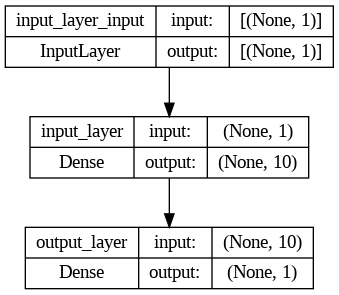

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

plot them against the ground truth labels.

Often is `y_test` or `y_true` versus `y_pred`.

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 71.15198],
       [ 75.82785],
       [ 80.50372],
       [ 85.17959],
       [ 89.85546],
       [ 94.53133],
       [ 99.20719],
       [103.88307],
       [108.55894],
       [113.23481]], dtype=float32)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Notes:** if your feel like you're going to reuse some kind of functionality in the future, it's better to make it a function.

In [34]:
# crate a plotting functions
def plot_prediction(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_lables=y_test, predictions=y_pred):
  """plots training data, test data"""
  plt.figure(figsize=(12,8))

  plt.scatter(train_data, train_labels, c='b', label="training")
  plt.scatter(test_data, test_lables, c='g', label="testing")
  plt.scatter(test_data, predictions, c='r', label="predictions")

  plt.legend()


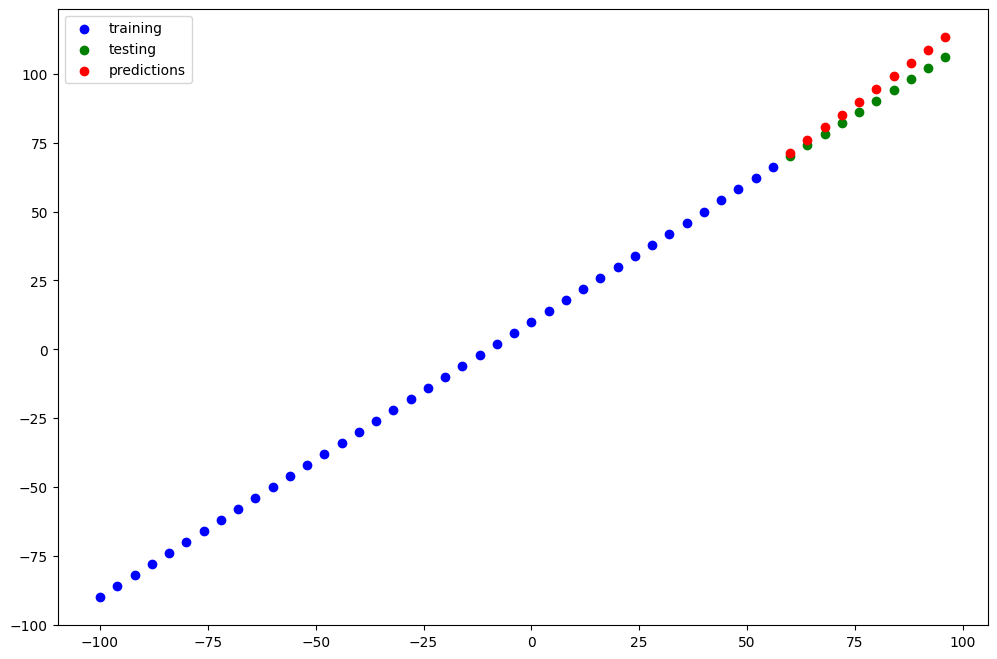

In [35]:
plot_prediction()

### Evaluating our model's predictions with regression evaluation metrics

depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Two main metrics:
* MAE - mean absolute error (a great start)
* MSE - mean squre error (when larger errors are more significant)

In [36]:
# Evaluating the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 4.1934 - mae: 4.1934


[4.193393707275391, 4.193393707275391]

In [37]:
# Calculate the mean absolute error
np.average(np.abs(y_test-y_pred))

14.76

In [38]:
model.evaluate(y_test, y_pred)

1/1 [==============================] - 0s 147ms/step - loss: 11.6897 - mae: 11.6897


[11.689671516418457, 11.689671516418457]

In [39]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae
# We get this result because y_test and y_pred are in different shape

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.078419, 13.70329 , 11.398511, 10.164083, 10.      , 11.01253 ,
       13.124315, 16.306458, 20.558937, 25.23481 ], dtype=float32)>

In [40]:
y_pred

array([[ 71.15198],
       [ 75.82785],
       [ 80.50372],
       [ 85.17959],
       [ 89.85546],
       [ 94.53133],
       [ 99.20719],
       [103.88307],
       [108.55894],
       [113.23481]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.15198,  75.82785,  80.50372,  85.17959,  89.85546,  94.53133,
        99.20719, 103.88307, 108.55894, 113.23481], dtype=float32)>

In [43]:
# We get the same result as model.evaluate()
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=4.1933937>

In [44]:
# Calculate the mean squre error
# np.average(np.square(y_test-tf.squeeze(y_pred)))
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=21.35315>

### Runing experiments to improve our model

The machine learning practitioner's motto:
> Experiment, experiment, experiment.

1. Get more data. (more patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - more layers or more hidden units
3. Train for longer - more chances to find patterns in the data.

3 modelling experiment

1. 1 layer, trained for 100 epochs
2. 2 layers, trained for 100 epochs
3. 2 layers, trained for 500 epochs

In [45]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [46]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 21.2194 - mae: 21.2194
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2586 - mae: 10.2586
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5993 - mae: 10.5993
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5989 - mae: 9.5989
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.5142 - mae: 10.5142
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7344 - mae: 9.7344
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8238 - mae: 8.8238
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0602 - mae: 9.0602
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.3965 - mae: 19.3965
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4690 - mae: 10.4690
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 52ms/step


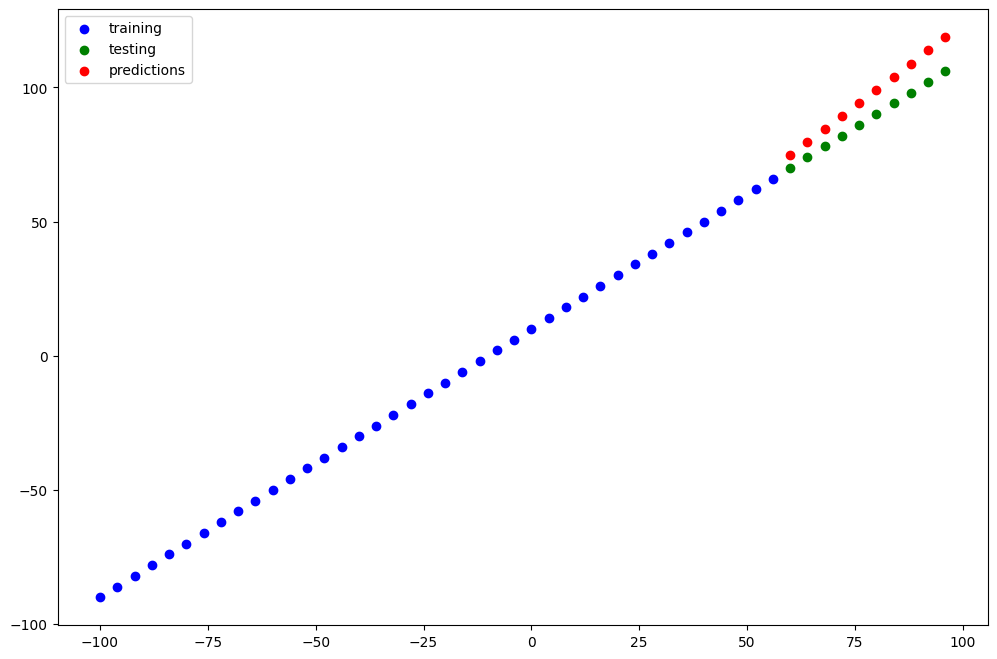

In [47]:
y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_1))
mse_1 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_1))


In [49]:
# Build model_2 - 2 layers, trained for 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [50]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


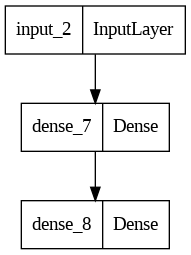

In [51]:
plot_model(model=model_2)

1/1 [==============================] - 0s 64ms/step


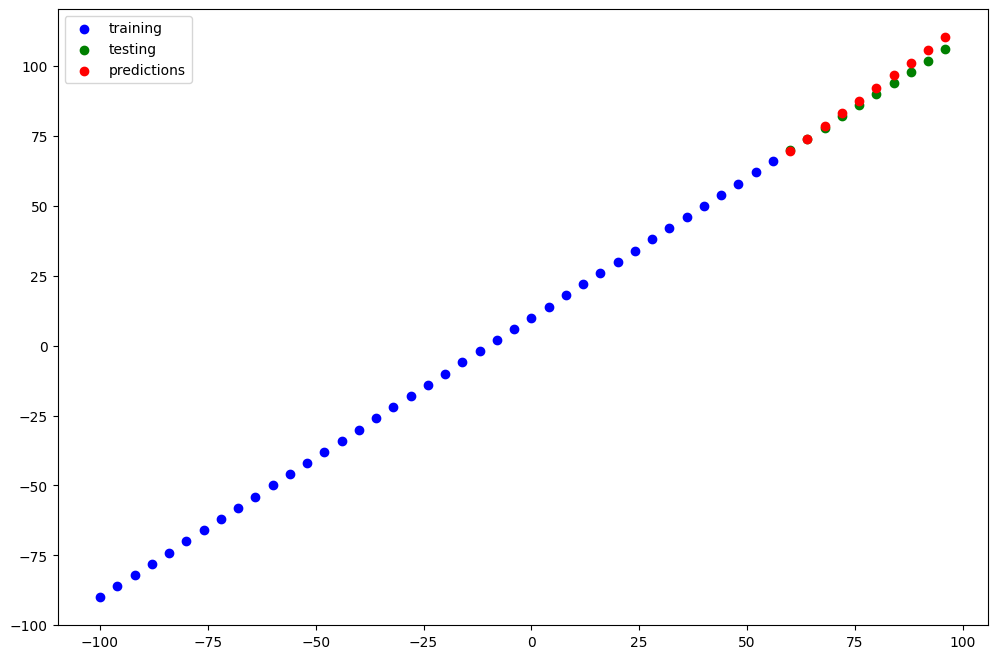

In [52]:
# model_2 predictions
pred_2 = model_2.predict(X_test)
plot_prediction(predictions=pred_2)

In [53]:
# Calculate model_2 evaluation metrics
mae_2 = tf.keras.metrics.mae(y_test, tf.squeeze(pred_2))
mse_2 = tf.keras.metrics.mse(y_test, tf.squeeze(pred_2))

In [54]:
# Build model_2 - 2 layers, trained for 100 epochs
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 55ms/step


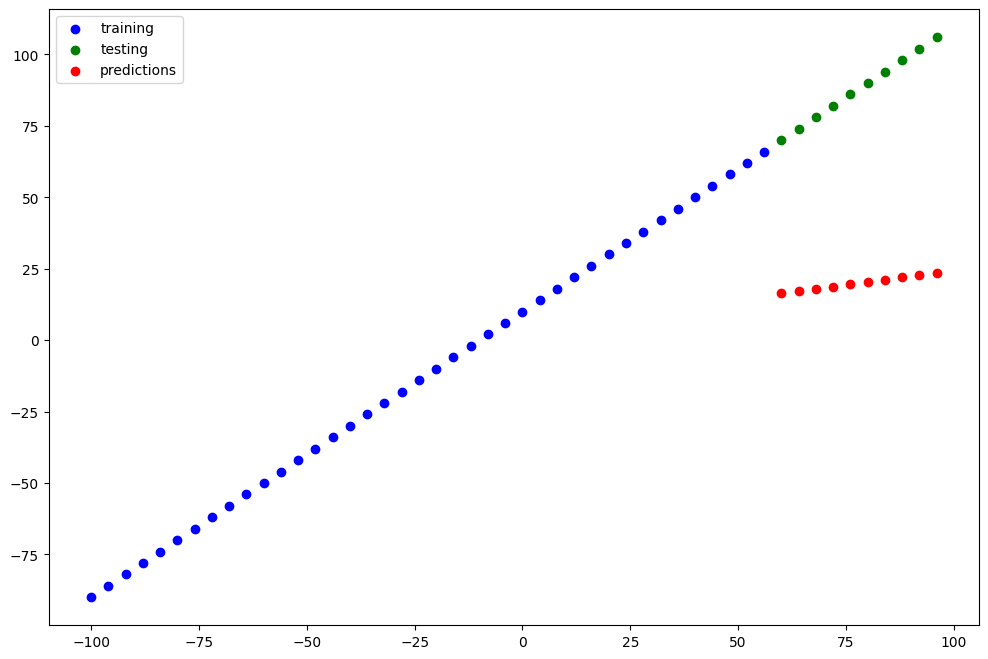

In [55]:
# Plot model_3 predictions
pred_3 = model_3.predict(X_test)
plot_prediction(predictions=pred_3)

In [56]:
# Calculate model_2 evaluation metrics
mae_3 = tf.keras.metrics.mae(y_test, tf.squeeze(pred_3))
mse_3 = tf.keras.metrics.mse(y_test, tf.squeeze(pred_3))

**Note:** you want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Compare the results of our experiments.

Each experiment we run, it is actually to find what does not work.

In [57]:
# compare our model's results using a pandas
import pandas as pd

model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.660333,81.539726
1,model_2,2.045338,6.146658
2,model_3,68.040787,4714.479004


Looks like model_2 performed the best.

In [58]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figure out what dies work. Remember the ML practitioner's motto: "experiment, experiment, experiment."

## Tracking your experiments

One really good habit in ML modelling is to track the results of your experiments.
And when doing so, it can be tedious.

Luckliy, there are tools to help us.

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to track modelling experiments.
* Weights & Biases - a tool for tracking all of kinds of ML experiments.

### Saving our models

Save the current best model, which allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

---

If we save model with **SavedModel** or **HDF5** format, the model can be restored using `tf.keras.model.load_model`

In [59]:
# Save model using SaveModel format

model_2.save("best_model_SavedModel")

In [60]:
# save model using HDF5 format

model_2.save("best_model_HDF5.h5")

### Loading in a saved model

In [61]:
# Load in the SavedModel format
loaded_SavedModel = tf.keras.models.load_model("/content/best_model_SavedModel")
loaded_SavedModel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel.predict(X_test)
model_2_preds == loaded_SavedModel_preds

1/1 [==============================] - 0s 72ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [63]:
# Load model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [64]:
loaded_h5_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 56ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [65]:
# Compare the mAE of model_2_preds and predictions of loaded model.
# tf.keras.metrics.mae(y_test, tf.squeeze(model_2_preds)) == tf.keras.metrics.mae(y_test, tf.squeeze(loaded_SavedModel_preds))b

SyntaxError: ignored

## A large example

In [2]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


some columns are categorical and some are numbers.
* One-hot encode
* pandas get dummies.

In [4]:
# Let's try one-hot encode
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Create X & y values (features and label)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot[['charges']]

In [6]:
# Create a train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural network model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
34/34 [==============================] - 1s 4ms/step - loss: 8625.9395 - mae: 8625.9395
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 7883.6777 - mae: 7883.6777
Epoch 3/50
34/34 [==============================] - 0s 3ms/step - loss: 7592.7310 - mae: 7592.7310
Epoch 4/50
34/34 [==============================] - 0s 2ms/step - loss: 7670.3657 - mae: 7670.3657
Epoch 5/50
34/34 [==============================] - 0s 2ms/step - loss: 7673.2090 - mae: 7673.2090
Epoch 6/50
34/34 [==============================] - 0s 2ms/step - loss: 7615.6597 - mae: 7615.6597
Epoch 7/50
34/34 [==============================] - 0s 2ms/step - loss: 7563.5537 - mae: 7563.5537
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 7740.1973 - mae: 7740.1973
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 7597.7290 - mae: 7597.7290
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 7695.1187 - mae: 7695.1187
Epoch 11/

In [9]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8410.7178 - mae: 8410.7178


[8410.7177734375, 8410.7177734375]

Let's try improve our model

1. Add an extra layer with more hidden units and use Adam optimizer.
2. Train for longer

In [11]:
# Set random seed
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [12]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5069.1294 - mae: 5069.1294


[5069.12939453125, 5069.12939453125]

In [13]:
# Set random seed
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [14]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3489.6030 - mae: 3489.6030


[3489.60302734375, 3489.60302734375]

Text(0.5, 0, 'epochs')

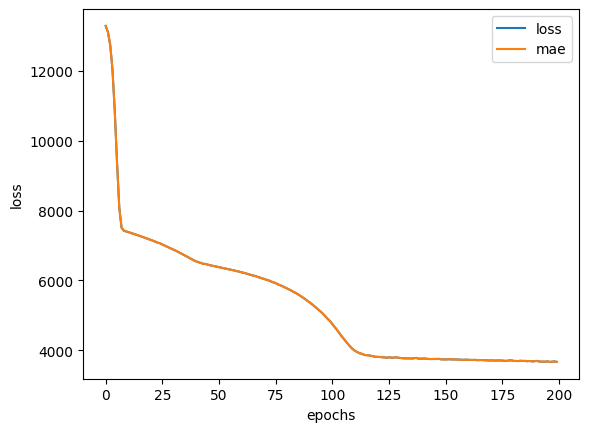

In [15]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> How long should you train for?

It depends. It depends on the problem you're working on. TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

The goal of **normalization** is to change the values of numeric columns in the dataset to a common scale.

* MinMaxScaler - convert values to between 0 and 1. (default scaler for neural network)
* StandardScaler - divides each value by the standard deviation. (change a feature to have close to normal distribution)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Frequency'>

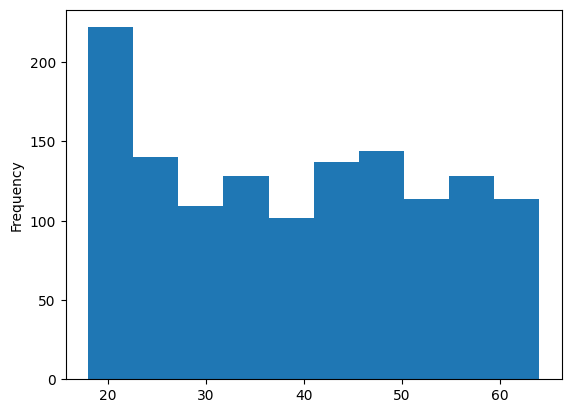

In [16]:
X["age"].plot(kind='hist')

To prepare our data, need some classes form sklearn

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
# Create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ["age", "bmi", "children"]),
  (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [25]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [26]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [27]:
# Set random seed
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [28]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3166.8391 - mae: 3166.8391


[3166.839111328125, 3166.839111328125]

In [29]:
# results fo model 3
# loss: 3489.6030 - mae: 3489.6030 [3489.60302734375, 3489.60302734375]

> Basically, machine learning is to try training a whole bunch of models, and see which works the best.

**TensorBoard** helps you well.